<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #0037ffff, #252d7aff); 
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Lab 2 Day 20/8
    </h1>
</div>


<h4 style="color:#0066ffff">1. Importing Libraries for Building and Visualizing an MNIST Neural Network Model and Displaying Its Version</h4>

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
print(tf.__version__)

2.20.0


<h3 style="color:#0066ffff">2. Loading the MNIST Dataset into Training and Testing Sets</h3>

In [3]:
(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()

<h3 style="color:#0066ffff">3. Displaying the Size and Shape of the MNIST Dataset</h3>

In [4]:
print("The number of training images is {}".format(training_images.shape[0]))
print("The number of testing images is {}".format(testing_images.shape[0]))
print("The shape of an image is {}X{}".format(training_images.shape[1],
                                                training_images.shape[2]))

The number of training images is 60000
The number of testing images is 10000
The shape of an image is 28X28


<h3 style="color:#0066ffff">4. Setting NumPy Print Options for Wider Output Display</h3>

In [5]:
np.set_printoptions(linewidth=200)

<h3 style="color:#0066ffff">5.Displaying a Random Training Image with Its Label</h3>

1


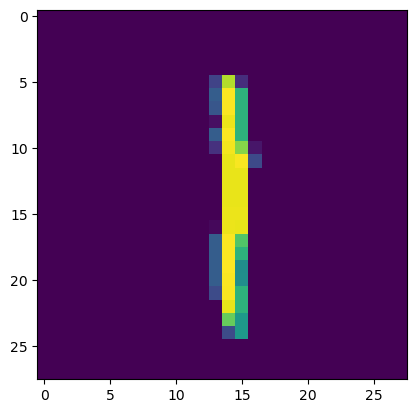

In [6]:
img_number = random.randint(0, training_images.shape[0])
plt.imshow(training_images[img_number])
print(training_labels[img_number])

<h3 style="color:#0066ffff">6. Normalizing Training and Testing Images to Range [0,1]</h3>

In [7]:
training_images  = training_images / 255.0
testing_images = testing_images / 255.0

<h3 style="color:#0066ffff">7. Building a Neural Network Model for MNIST Classification</h3>

In [8]:
model = Sequential([Flatten(input_shape=(28,28)),Dense(128, activation=tf.nn.relu),Dense(10, activation=tf.nn.softmax)])

c:\Users\Rammah\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<h3 style="color:#0066ffff">8. Compiling the MNIST Model with Adam Optimizer and Sparse Categorical Crossentropy Loss</h3>

In [9]:
model.compile(optimizer = tf.optimizers.Adam(),loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

<h3 style="color:#0066ffff">9. Training the MNIST Model for 5 Epochs</h3>

In [10]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9252 - loss: 0.2586
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9663 - loss: 0.1140
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9766 - loss: 0.0777
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9825 - loss: 0.0580
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9864 - loss: 0.0449


<h3 style="color:#0066ffff">10. Evaluating the Model on Testing Data and Displaying Accuracy</h3>

In [11]:
evaluation = model.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.9776 - loss: 0.0758
Accuracy on the testing images is 97.75999784469604



<h3 style="color:#0066ffff">11. Displaying the Model Architecture Summary</h3>

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)